In [5]:
from source_light import *
import corner
import numpy as np

### Check function description

In [6]:
sample_source_galaxy_pars?

Signature: sample_source_galaxy_pars(size)
Docstring:
Sample source galaxy parameters using a trained Masked Autoregressive Flow model.

Parameters
----------
size : int
    Number of samples to draw.

Returns
-------
m_VIS_Euclid : Magnitude in Euclid VIS band (ndarray)
log10_mStar : Stellar mass in log10 solar mass (ndarray)
Re_maj : Sersic (effective) radius in kPc (ndarray)
z : Source galaxy redshift (ndarray)
q : Axis ratio (ndarray)
n_sersic : Sersic index (ndarray)

Each array has length `size`.
File:      ~/Projects/mml/github/mml-joint-detection/source_light.py
Type:      function

### Sample source galaxy parameters 

In [7]:
m_VIS_Euclid, log10_mStar, Re_maj, z, q, n_sersic = sample_source_galaxy_pars(10000)
sample = np.column_stack([
    m_VIS_Euclid, log10_mStar, Re_maj, z, q, n_sersic 
])

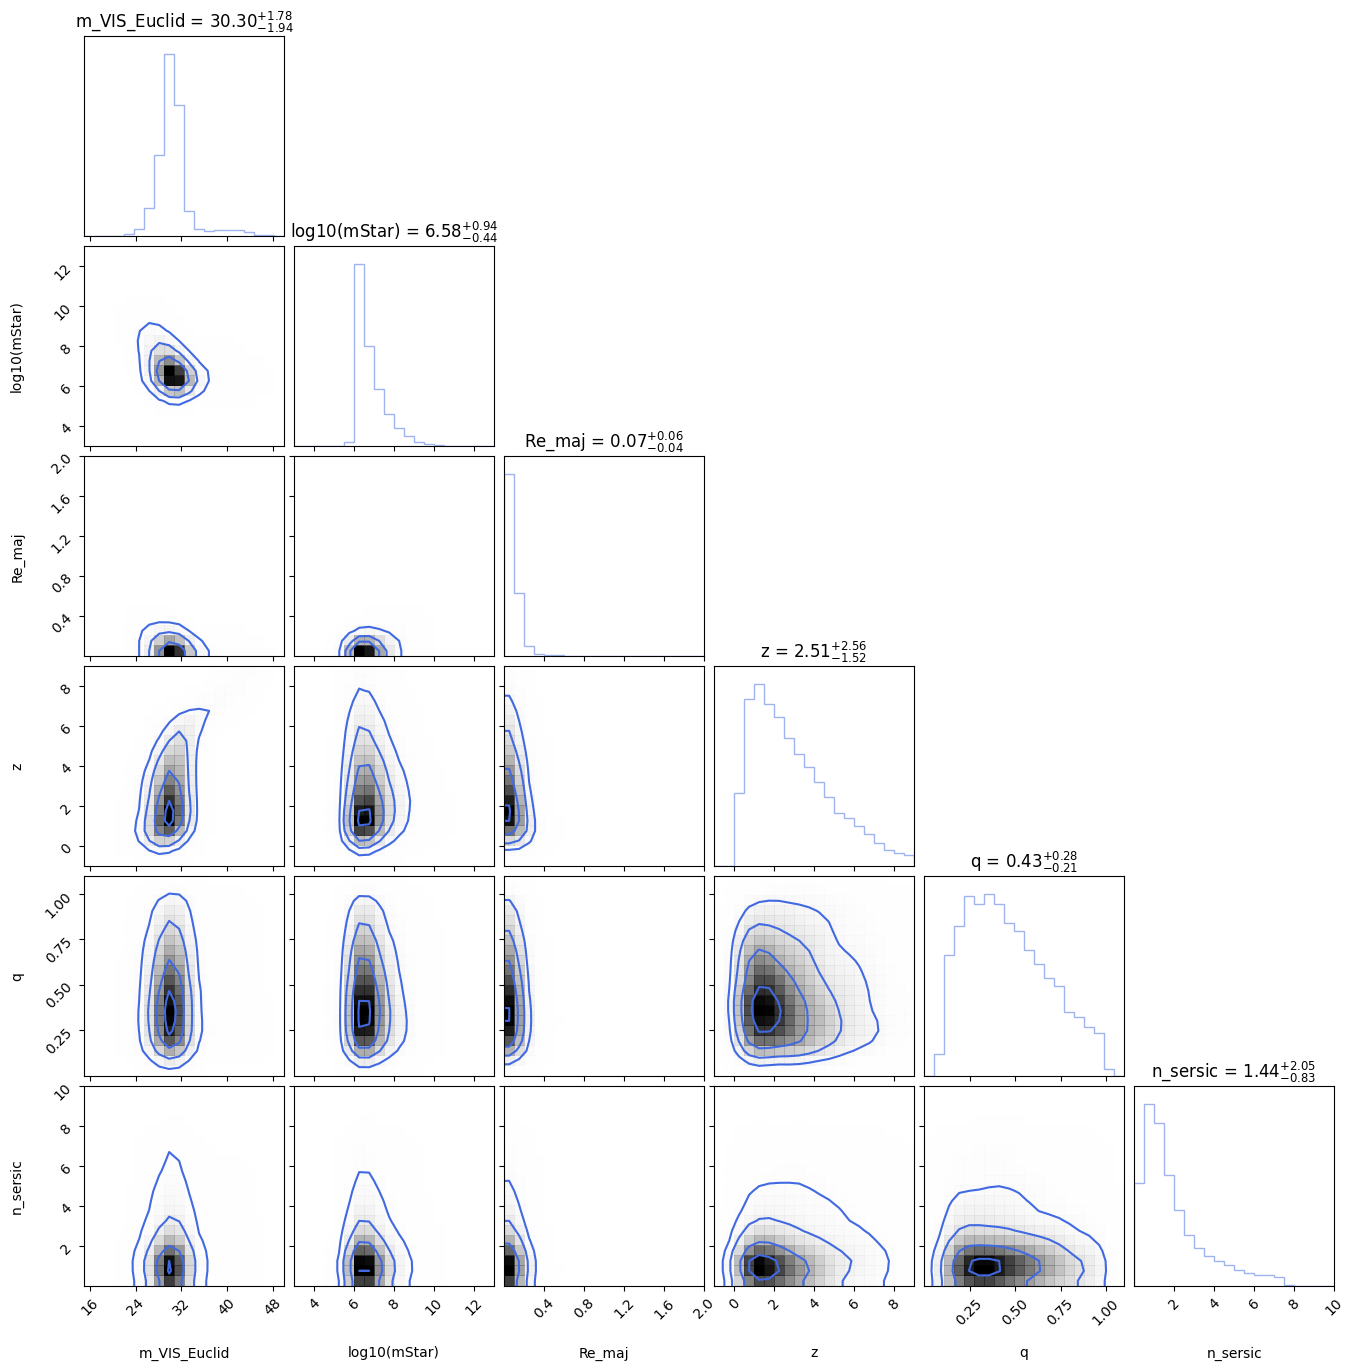

In [8]:
labels = ["m_VIS_Euclid", "log10(mStar)", "Re_maj", "z", "q", "n_sersic"]
lower_bounds = np.array([15, 3, 0, -1, 0, 0])
upper_bounds = np.array([50, 13, 2, 9, 1.1, 10])
import sys, os
sys.path.append(os.path.abspath(".."))
ranges = [(lo, hi) for lo, hi in zip(lower_bounds, upper_bounds)]

figure = corner.corner(
    sample,
    labels=labels,
    show_titles=True,       
    title_fmt=".2f", 
    range=ranges,
    smooth=True,        
    plot_datapoints=False,
    hist_kwargs={"density": True, "alpha": 0.5,  "color": "royalblue"},
    contour_kwargs={"colors": ["royalblue"]},
)